### Counting Images in Training and Testing Sets

In the grand adventure of machine learning, data is my trusty sidekick. This code helps me count the number of images in my training and testing datasets—because who doesn't love a good tally?

First, I import the `os` module to navigate my file directories like a pro. Essential stuff! Then, I define where my data lives—`train_dir` for training and `test_dir` for testing. Think of it as choosing my battlefield.

Next, I count the images in each class (Normal and Pneumonia) for training. After all, I can’t train a model on an empty stomach... I mean, dataset! I do a similar deal for the testing set because I need enough images to properly test my model, just like giving a student a surprise quiz to check their knowledge.

Finally, I print the counts in an easy-to-read format, giving me a quick overview of my dataset. It’s like getting a report card, but for images!

By keeping tabs on these counts, I ensure my model has a fair shot at success. Here’s to my dataset—may it lead me to better predictions!

In [1]:
import os

# Define paths
train_dir = 'Train'
test_dir = 'Test'

# Count the number of images in each class in the training set
train_normal_count = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
train_pneumonia_count = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))

# Count the number of images in each class in the test set
test_normal_count = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
test_pneumonia_count = len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))

# Print the counts
print(f"Training Set - Normal: {train_normal_count}, Pneumonia: {train_pneumonia_count}")
print(f"Test Set - Normal: {test_normal_count}, Pneumonia: {test_pneumonia_count}")

Training Set - Normal: 1342, Pneumonia: 3876
Test Set - Normal: 234, Pneumonia: 390


### Calculating Image Proportions in Training and Testing Sets

Now that I know how many images I have, it's time to figure out the proportions. After all, I need to see if my dataset is balanced, or if it’s favoring one class like a teacher’s pet!

First, I calculate the total number of images in both the training and testing sets. This is where I add up the counts of Normal and Pneumonia images, because who doesn’t love a good sum?

Next, I calculate the class proportions for each set. I divide the count of Normal and Pneumonia images by the total number of images and then multiply by 100 to get a nice percentage. This gives me the proportions for the training set and the testing set, making it super easy to visualize how my dataset is split.

Finally, I print the proportions with two decimal places, so I can see the exact distribution of classes. This helps me determine if I need to balance my dataset or if I’m ready to train my model without a lopsided view of the world. It’s like checking the ingredients before baking a cake—too much of one thing can spoil the fun!

In [2]:
# Calculate total images in training and test sets
total_train_images = train_normal_count + train_pneumonia_count
total_test_images = test_normal_count + test_pneumonia_count

# Calculate class proportions
train_normal_proportion = train_normal_count / total_train_images * 100
train_pneumonia_proportion = train_pneumonia_count / total_train_images * 100

test_normal_proportion = test_normal_count / total_test_images * 100
test_pneumonia_proportion = test_pneumonia_count / total_test_images * 100

# Print the proportions
print(f"Training Set - Normal: {train_normal_proportion:.2f}%, Pneumonia: {train_pneumonia_proportion:.2f}%")
print(f"Test Set - Normal: {test_normal_proportion:.2f}%, Pneumonia: {test_pneumonia_proportion:.2f}%")

Training Set - Normal: 25.72%, Pneumonia: 74.28%
Test Set - Normal: 37.50%, Pneumonia: 62.50%


### Calculating Class Weights for Imbalanced Data

Now that I've checked the proportions of images, it's time to tackle the pesky issue of class imbalance. Because let’s face it, my model might develop a favorite if one class gets way more attention!

I start by defining the class labels, where Normal images are labeled as 0 and Pneumonia images as 1. It’s like assigning a number to my friends at a party—everyone has a place!

Next, I use `compute_class_weight` from `sklearn` to calculate the weights for each class. This method is smart enough to balance things out, ensuring that the model pays equal attention to both classes, regardless of how many images are in each.

Finally, I convert the calculated class weights into a dictionary format, so it’s easier to read. I print these weights to see how much my model will value each class during training. This way, I can help my model stay fair and square, without any bias toward the more popular class!

In [3]:
from sklearn.utils import class_weight
import numpy as np

# Define class labels
train_classes = np.array([0] * train_normal_count + [1] * train_pneumonia_count)  # 0 for Normal, 1 for Pneumonia

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_classes), y=train_classes)

# Convert class weights to a dictionary format
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Print the calculated weights
print(f"Class Weights: {class_weights_dict}")

Class Weights: {0: 1.9441132637853948, 1: 0.6731166150670794}


### Importing Essential Libraries

Before diving into the deep end of model training, I need to gather my tools. Think of this as assembling my superhero squad, ready to tackle the challenge ahead!

First, I bring in `numpy`, the trusty companion for numerical operations. Then, I call upon `ImageDataGenerator` from TensorFlow's Keras to help with image preprocessing and augmentation—because who doesn’t like a little makeover?

Next, I import some key callbacks: `EarlyStopping` and `ReduceLROnPlateau`. These are like my personal trainers, keeping an eye on the model's performance and ensuring it doesn’t overtrain or tire out too quickly.

I also enlist `ResNet50`, a popular pre-trained model known for its amazing performance on image classification tasks. It’s like having a seasoned pro on my team!

Lastly, I bring in some useful tools from `sklearn`: `class_weight` for balancing the dataset and `classification_report` and `confusion_matrix` for evaluating my model’s performance. With this lineup, I’m all set to train a robust pneumonia detection model and have some fun along the way!

In [4]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix

### Step 1: Data Augmentation

Now, it's time to give my training data a bit of a glow-up! I’m using `ImageDataGenerator` to perform data augmentation, which is basically like creating a mini version of my dataset by applying various transformations. Why? Because who doesn’t want more training examples, right?

Here’s what I’m doing:
- **Rescaling**: First off, I rescale pixel values to a range between 0 and 1. This is like getting my images into shape before they hit the gym.
- **Rotation**: I allow some rotation (up to 20 degrees). After all, pneumonia doesn’t just strike from one angle!
- **Shifting**: I’m also shifting images horizontally and vertically by 20%. Think of it as a little nudge to help the model learn that pneumonia can appear in various spots.
- **Shearing and Zooming**: A bit of shear and zoom (20% each) adds some dynamic flair to my dataset—like spicing up a bland meal.
- **Flipping**: Horizontal flips are also on the menu. Because, why not? 
- **Fill Mode**: I set the fill mode to 'nearest' to handle any empty pixels that might appear during transformations. It's like using a band-aid for the little gaps.

For my test data, I’m keeping it simple—just rescaling. No need for theatrics when evaluating performance! With this setup, I’m ready to train my model on a more diverse and robust dataset.

In [5]:
# Step 1: Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

### Class Weights Calculation

In this step, I’m calculating class weights to handle the imbalance in my dataset—because, let's face it, no one likes unfair treatment!

Here’s what’s happening:
- I’m creating a dictionary called `class_weights` to store the weight for each class.
- For the **Normal class (0)**, I calculate its weight by dividing the count of normal images by the total number of training images. This helps the model understand how prevalent the normal cases are.
- For the **Pneumonia class (1)**, I do the same: divide the pneumonia image count by the total training images. This ensures that my model pays extra attention to the less frequent pneumonia cases.

By adjusting the weights, I’m giving my model a fighting chance to learn from both classes effectively. Now, it won't just breeze through the normal cases!

In [ ]:
# Assuming you have calculated train_normal_count and train_pneumonia_count
class_weights = {
    0: train_normal_count / total_train_images,  # Normal class
    1: train_pneumonia_count / total_train_images  # Pneumonia class
}

### Custom Data Generator

In this step, I’m creating a **custom generator** function that adds some extra flair to my training process—like giving my model a cheat sheet!

Here's how it works:
- The function `custom_generator` takes in my existing `train_gen` and the calculated `class_weights`.
- Inside an infinite loop (because who doesn't love endless possibilities?), I get the next batch of images and labels from the original generator using `next(train_gen)`. It’s like pulling out a surprise from a box!
- Then, I create a **weights array**. For each label in the batch, I fetch the corresponding weight from `class_weights`. This tells the model how important each sample is during training. It's like giving special treatment to the underdogs!
- Finally, I **yield** the images, labels, and weights together. This means that when the generator is called, it will return a batch of images, their corresponding labels, and the weights, making my training a more balanced affair.

With this custom generator, I’m not just feeding my model images—I’m making sure it understands the stakes!

In [6]:
import numpy as np

# Create a custom generator function
def custom_generator(train_gen, class_weights):
    while True:
        # Get the next batch of data from the original generator
        x, y = next(train_gen)  # Use next to get images and labels
        
        # Create a weights array based on the labels
        weights = np.array([class_weights[int(label)] for label in y])
        
        yield x, y, weights  # Yield images, labels, and weights

### Training and Testing Generators

In this segment, I'm setting up my **data generators** to efficiently feed images into my model during training and testing. Let's break it down:

1. **Training Generator**: 
   - I use `train_datagen.flow_from_directory()` to create `train_gen`, which pulls images straight from the specified `train_dir`. 
   - The `target_size=(224, 224)` ensures that every image is resized to a consistent size—because no one likes surprises!
   - With `batch_size=32`, I’m telling it to serve up 32 images at a time, making the training process efficient and snappy.
   - The `class_mode='binary'` means I’m dealing with a binary classification problem (Normal vs. Pneumonia). 
   - Setting `shuffle=True` ensures that my training batches are mixed up—variety is the spice of life!

2. **Custom Training Generator**: 
   - Here, I create `custom_train_gen` using my previously defined `custom_generator` function. This magical generator incorporates class weights, so my model knows to pay extra attention to the underrepresented class.

3. **Testing Generator**: 
   - I create `test_gen` using `test_datagen.flow_from_directory()` in a similar fashion, but this time I point it to `test_dir`.
   - No need for class weights during testing, so I keep it simple with `shuffle=False`. This ensures I evaluate the model on the test set in a predictable order, making results easier to interpret.

With these generators in place, I’m all set to train and test my model like a pro!

In [7]:
# Create the training generator using the custom generator function
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

# Create a custom training generator that includes class weights
custom_train_gen = custom_generator(train_gen, class_weights)

# For the test generator, you don't need to modify it since you won't use weights during testing
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Calculating Steps for Training and Testing Generators

In this snippet, I’m figuring out how many **steps** my model will need to take during training and testing. Here’s how it works:

1. **Total Steps Calculation**:
   - For both the training and testing phases, I use `math.ceil()` to round up the number of batches needed.
   - `train_steps` is calculated by dividing the total number of training samples (`train_gen.samples`) by the batch size (`train_gen.batch_size`). This tells me how many times I need to feed data to the model during training.
   - Similarly, `test_steps` is calculated for the testing phase using the test generator.

2. **Why Use `math.ceil()`?**:
   - The `math.ceil()` function ensures that I account for any leftover images that don't fill a complete batch. After all, I don’t want to leave any data behind—every image counts in the quest for accurate predictions!

With these step calculations, I'm ready to train and test my model without leaving any samples in the dust!

In [9]:
import math
# Calculate total images in each generator
train_steps = math.ceil(train_gen.samples / train_gen.batch_size)
test_steps = math.ceil(test_gen.samples / test_gen.batch_size)

### Building and Compiling the Model

In this section, I'm leveraging the power of the **ResNet50** architecture to create my model. Here's a breakdown of what I'm doing:

1. **Loading ResNet50**:
   - I start by loading the **ResNet50** model pre-trained on the **ImageNet** dataset, excluding the top layer (`include_top=False`). This allows me to use its deep feature extraction capabilities without being tied to the original classification tasks.

2. **Freezing Layers**:
   - To prevent the pre-trained weights from changing during training, I freeze all layers of the base model. This means I’m only training the new layers I add, which helps retain the learned features of ResNet50.

3. **Adding Custom Layers**:
   - **Global Average Pooling**: I reduce the spatial dimensions of the output from ResNet50, creating a single feature vector for each image.
   - **Batch Normalization**: This helps in stabilizing the learning process and speeds up training.
   - **Dropout Layer**: I add a dropout layer to prevent overfitting by randomly setting 50% of the inputs to zero during training.
   - **Dense Layers**: The first dense layer has 512 neurons with a **ReLU** activation function, capturing complex features, and the final dense layer has a single neuron with a **sigmoid** activation function for binary classification.

4. **Creating the Model**:
   - I define the new model's input and output, linking my custom layers to the frozen base model.

5. **Compiling the Model**:
   - Finally, I compile the model using the **Adam** optimizer and the **binary crossentropy** loss function, setting it up to track accuracy during training.

6. **Model Summary**:
   - I print a summary of the model architecture, giving me a quick overview of how many layers and parameters are involved.

With this robust model in place, I'm ready to tackle the pneumonia classification task!

In [11]:
# Load and Modify ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)  # Batch Normalization
x = layers.Dropout(0.5)(x)  # Dropout for regularization
x = layers.Dense(512, activation='relu')(x)  # Dense layer
predictions = layers.Dense(1, activation='sigmoid')(x)  # Binary classification output

# Create the new model
model = models.Model(inputs=base_model.input, outputs=predictions)

In [12]:
# Step 5: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,645,505 (94.02 MB)

 Trainable params: 1,053,697 (4.02 MB)

 Non-trainable params: 23,591,808 (90.00 MB)

### Model Training with Callbacks

In this section, I'm setting up my training process for the model, complete with smart strategies to enhance performance.

1. **Callbacks**:
   - **Early Stopping**: I introduce an early stopping mechanism to monitor the validation loss (`val_loss`). If the loss doesn’t improve for **5 consecutive epochs** (patience), training will halt. This prevents overfitting by stopping the training when the model starts to learn noise instead of useful patterns. Plus, it automatically restores the best weights observed during training, so I don’t lose my model's best version.
   - **Learning Rate Reduction**: I implement a learning rate reduction strategy using `ReduceLROnPlateau`. It watches the validation loss, and if it plateaus (doesn’t improve) for **5 epochs**, the learning rate is reduced by a factor of **0.2**. This helps the model fine-tune its learning when it gets stuck, ensuring it can still find better solutions. I set a minimum learning rate of **1e-6** to prevent it from getting too tiny to make any meaningful updates.

2. **Training the Model**:
   - I kick off the actual training using the `fit` method. Here’s what I specify:
     - **Custom Generator**: I use my custom training generator (`custom_train_gen`) to ensure class weights are included during training.
     - **Steps per Epoch**: I set `steps_per_epoch` to the number of batches in my training data.
     - **Validation Data**: I provide the test generator for validation, which gives insights into how well the model performs on unseen data.
     - **Epochs**: I set the initial number of epochs to **10**, but I know I can adjust this later based on performance.
     - **Callbacks**: I pass in my early stopping and learning rate reduction callbacks to ensure my model is learning efficiently.

By combining these strategies, I’m poised to train my model effectively while minimizing the risks of overfitting or stagnation!

In [13]:
# Step 6: Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [14]:
# Step 7: Train the Model
history = model.fit(
    custom_train_gen,  # Use the custom generator
    steps_per_epoch=train_steps,
    validation_data=test_gen,
    validation_steps=test_steps,
    epochs=10,  # Increase the number of epochs as needed
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7944 - loss: 0.4355

D:\Anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 648s 4s/step - accuracy: 0.7946 - loss: 0.4352 - val_accuracy: 0.6811 - val_loss: 0.6120 - learning_rate: 0.0010
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8394 - loss: 0.3236

D:\Anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 531s 3s/step - accuracy: 0.8394 - loss: 0.3237 - learning_rate: 0.0010
Epoch 3/10


D:\Anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
D:\Anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 1075s 7s/step - accuracy: 0.8596 - loss: 0.3184 - val_accuracy: 0.8269 - val_loss: 0.4359 - learning_rate: 0.0010
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 727s 4s/step - accuracy: 0.8538 - loss: 0.3247 - learning_rate: 0.0010
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 885s 5s/step - accuracy: 0.8372 - loss: 0.3310 - val_accuracy: 0.8446 - val_loss: 0.3586 - learning_rate: 0.0010
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 706s 4s/step - accuracy: 0.8636 - loss: 0.2884 - learning_rate: 0.0010
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 824s 5s/step - accuracy: 0.8574 - loss: 0.3070 - val_accuracy: 0.8237 - val_loss: 0.3827 - learning_rate: 0.0010
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 768s 5s/step - accuracy: 0.8602 - loss: 0.3014 - learning_rate: 0.0010
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 864s 5s/step - accuracy: 0.8600 - loss: 0.3030 - val_accuracy: 0.8446 - val_loss: 0.3780 - learning_rate: 0.0010
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 803s 5s/step - accuracy:

### Evaluating Model Performance

Now it’s time to see how well my model performs on the test data. Let’s break it down:

1. **Predictions**:
   - I use the model to predict outcomes on the test data with `model.predict()`. This gives me the probabilities of each image being classified as pneumonia.
   - I convert these probabilities into class labels (0 for Normal and 1 for Pneumonia) using a simple rule: if the predicted probability is greater than **0.5**, I call it pneumonia; otherwise, it’s normal.

2. **Classification Report**:
   - I print a classification report that provides a comprehensive overview of how well my model performed, showing metrics like precision, recall, and F1 score. These metrics help me understand not just how many predictions were correct, but also how well the model identifies each class.

3. **Confusion Matrix**:
   - I create a confusion matrix that visually represents the number of correct and incorrect predictions. This matrix helps me see how many instances of each class were correctly identified versus misclassified.

4. **Performance Metrics**:
   - I calculate and print several important metrics:
     - **Accuracy**: The overall correctness of the model.
     - **Precision**: The proportion of true positive results (correct pneumonia predictions) among all positive predictions.
     - **Recall**: The proportion of true positives among all actual positives (how well the model captures pneumonia cases).
     - **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two.

5. **ROC Curve and AUC**:
   - I plot the Receiver Operating Characteristic (ROC) curve, which illustrates the trade-off between true positive rates and false positive rates at various threshold settings. 
   - I also calculate the Area Under the Curve (AUC), a single metric that summarizes the model’s ability to discriminate between classes. A higher AUC indicates better model performance.

6. **Visualizing the Confusion Matrix**:
   - To make the confusion matrix easier to interpret, I plot it using a heatmap. This provides a clear visual representation of how the model's predictions compare to the actual labels, making it easier to spot patterns in misclassifications.

By going through these steps, I gain valuable insights into my model's strengths and weaknesses, allowing me to refine my approach for even better results in the future!

In [15]:
# Step 8: Evaluate the Model
y_pred = model.predict(test_gen, steps=test_steps)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

# Print classification report
print(classification_report(test_gen.classes, y_pred_classes))

# Optional: Print confusion matrix
confusion_mtx = confusion_matrix(test_gen.classes, y_pred_classes)
print("Confusion Matrix:\n", confusion_mtx)


20/20 ━━━━━━━━━━━━━━━━━━━━ 107s 5s/step
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       234
           1       0.89      0.86      0.87       390

    accuracy                           0.84       624
   macro avg       0.83      0.84      0.84       624
weighted avg       0.85      0.84      0.85       624

Confusion Matrix:
 [[191  43]
 [ 54 336]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step
Accuracy: 0.84
Precision: 0.89
Recall: 0.86
F1 Score: 0.87
Confusion Matrix:
[[191  43]
 [ 54 336]]


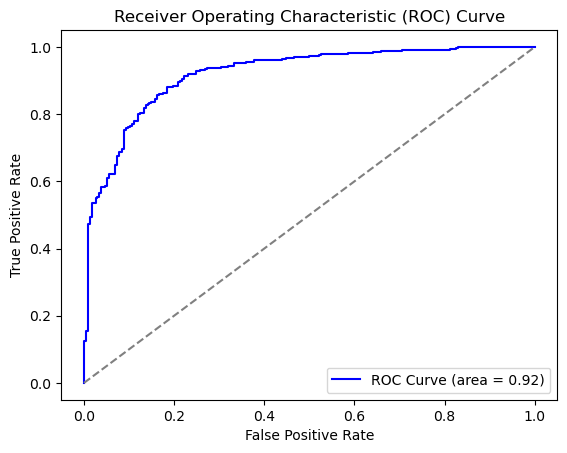

              precision    recall  f1-score   support

      Normal       0.78      0.82      0.80       234
   Pneumonia       0.89      0.86      0.87       390

    accuracy                           0.84       624
   macro avg       0.83      0.84      0.84       624
weighted avg       0.85      0.84      0.85       624



In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Assuming `y_true` are true labels and `y_pred` are predicted labels
y_true = test_gen.classes  # Actual labels from the test set
y_pred = model.predict(test_gen)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary values

# 1. Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# 2. Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
print(f'Confusion Matrix:\n{cm}')

# 3. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 4. Classification Report
print(classification_report(y_true, y_pred_classes, target_names=['Normal', 'Pneumonia']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step


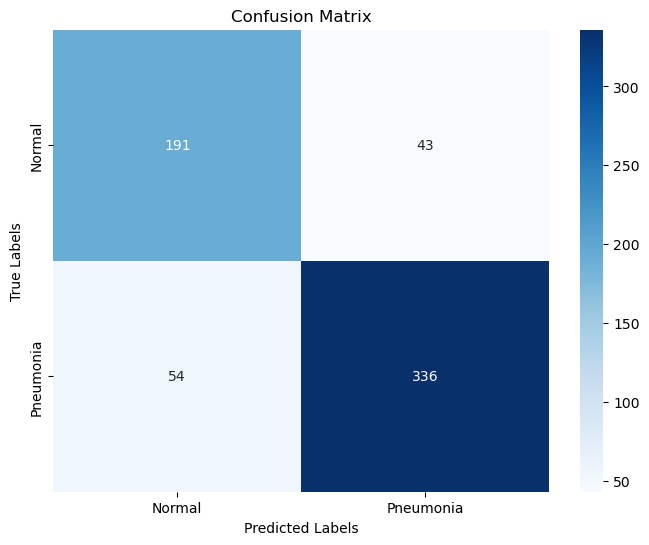

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming `y_true` are true labels and `y_pred_classes` are predicted labels
y_true = test_gen.classes  # Actual labels from the test set
y_pred = model.predict(test_gen)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary values

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Define the class labels (modify based on your classes)
class_names = ['Normal', 'Pneumonia']

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()